In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Zomato data .csv")

In [4]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet


In [5]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [7]:
df.head(1)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet


### Convert data type of column rate

In [20]:
def handleRate(value):
    value=str(value).split("/")
    value=value[0]
    return float(value)
df["rate"]=df["rate"].apply(handleRate)

In [21]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


### What type of restaurant do the majority of customers order from?

Text(0.5, 0, 'Type of resturant')

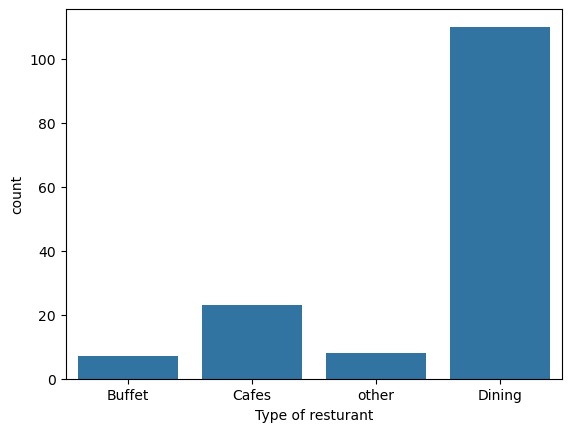

In [23]:
sns.countplot(x=df["listed_in(type)"])
plt.xlabel("Type of resturant")

### Conclusion
*   Majority of order falls dinning category

### 2 How many votes has each type of restaurant received from customers?

Text(0, 0.5, 'votes')

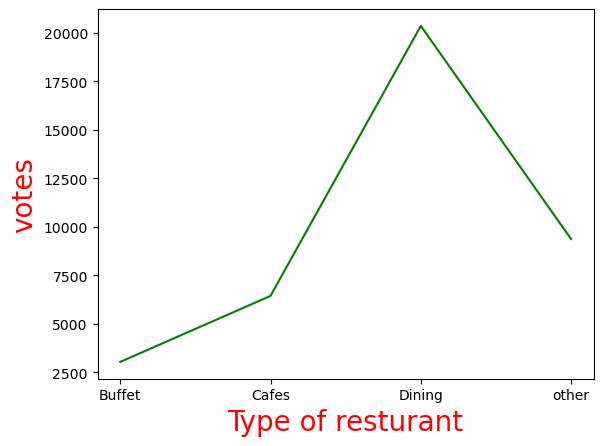

In [27]:
grouped_data=df.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green")
plt.xlabel("Type of resturant",c="red",size=20)
plt.ylabel("votes",c="red",size=20)

### Conclusion

* Dinning resturant recieved maximum votes.

### What are the ratings that the majority of restaurants have received?

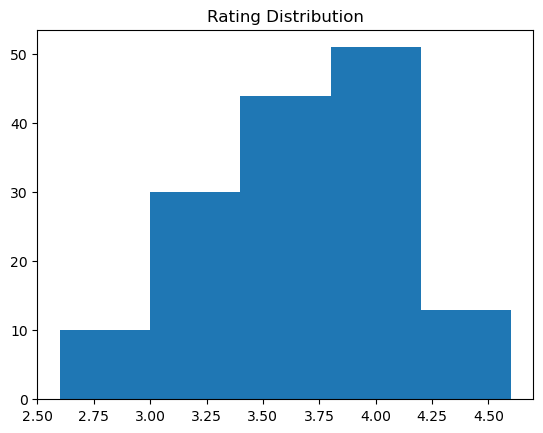

In [29]:

plt.hist(df["rate"],bins=5)
plt.title("Rating Distribution")
plt.show()

### Conclusion
* Majority resturant recieved rating from 3.5 to 4

### Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

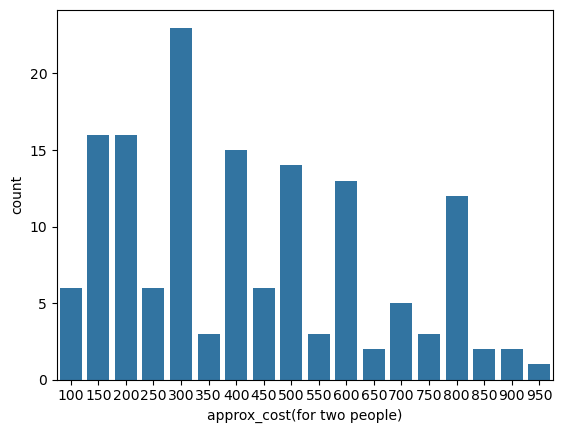

In [33]:
x=df["approx_cost(for two people)"]
sns.countplot(x=x)

### Conclusion
* Most of the couple spend $300

### Which mode (online or offline) has received the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

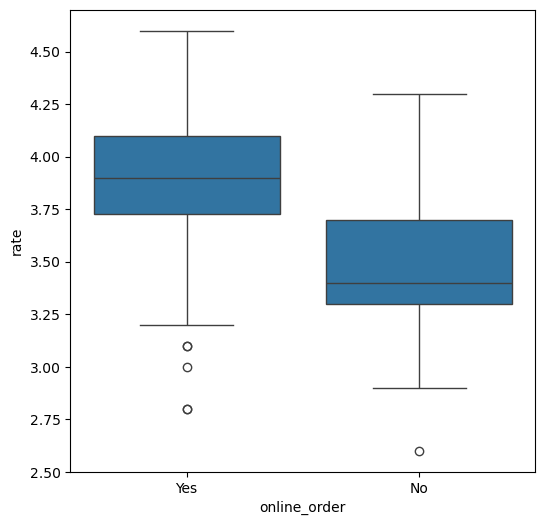

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=df)

### Conclusion
* Offiline order recieved lower rating in comparison to online rating